In [1]:
import matplotlib.pyplot as plt
import numpy as  np
import pandas as pd

In [3]:
df = pd.read_csv("Half_Ironman_df6.csv")
df.head()

,Gender,AgeGroup,AgeBand,Country,CountryISO2,EventYear,EventLocation,SwimTime,Transition1Time,BikeTime,Transition2Time,RunTime,FinishTime
0,M,40-44,40,Andorra,AD,2019,IRONMAN 70.3 South American Championship Bueno...,1679,119,9107,95,5515,16514
1,M,45-49,45,Andorra,AD,2019,IRONMAN 70.3 South American Championship Bueno...,2070,177,9160,132,6070,17609
2,M,45-49,45,Andorra,AD,2020,IRONMAN 70.3 Bariloche,1667,161,9891,122,5190,17031
3,M,45-49,45,Andorra,AD,2019,IRONMAN 70.3 World Championship,1750,183,10363,160,5071,17527
4,M,40-44,40,Andorra,AD,2019,IRONMAN 70.3 World Championship,2063,182,10065,142,5556,18008


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840075 entries, 0 to 840074
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   Gender           840075 non-null  object
 1   AgeGroup         840075 non-null  object
 2   AgeBand          840075 non-null  int64 
 3   Country          840075 non-null  object
 4   CountryISO2      840075 non-null  object
 5   EventYear        840075 non-null  int64 
 6   EventLocation    840075 non-null  object
 7   SwimTime         840075 non-null  int64 
 8   Transition1Time  840075 non-null  int64 
 9   BikeTime         840075 non-null  int64 
 10  Transition2Time  840075 non-null  int64 
 11  RunTime          840075 non-null  int64 
 12  FinishTime       840075 non-null  int64 
dtypes: int64(8), object(5)
memory usage: 83.3+ MB


In [6]:
df.describe()

,AgeBand,EventYear,SwimTime,Transition1Time,BikeTime,Transition2Time,RunTime,FinishTime
count,840075.000000,840075.000000,840075.000000,840075.000000,840075.000000,840075.000000,840075.000000,840075.000000
mean,36.904936,2015.113096,2340.250398,286.679245,10675.310285,219.786933,7606.965184,21129.008952
std,10.837156,3.176755,486.450902,98.416839,1397.954592,94.242916,1588.104360,3076.234712
min,0.000000,2004.000000,1201.000000,46.000000,6511.000000,46.000000,4002.000000,13004.000000
25%,30.000000,2013.000000,2010.000000,211.000000,9682.000000,147.000000,6440.000000,18919.000000
50%,35.000000,2016.000000,2286.000000,280.000000,10503.000000,205.000000,7362.000000,20839.000000
75%,45.000000,2018.000000,2604.000000,359.000000,11483.000000,279.000000,8544.000000,23052.000000
max,85.000000,2020.000000,5997.000000,499.000000,17993.000000,499.000000,14999.000000,36529.000000


array([[<Axes: title={'center': 'AgeBand'}>,
        <Axes: title={'center': 'EventYear'}>,
        <Axes: title={'center': 'SwimTime'}>],
       [<Axes: title={'center': 'Transition1Time'}>,
        <Axes: title={'center': 'BikeTime'}>,
        <Axes: title={'center': 'Transition2Time'}>],
       [<Axes: title={'center': 'RunTime'}>,
        <Axes: title={'center': 'FinishTime'}>, <Axes: >]], dtype=object)

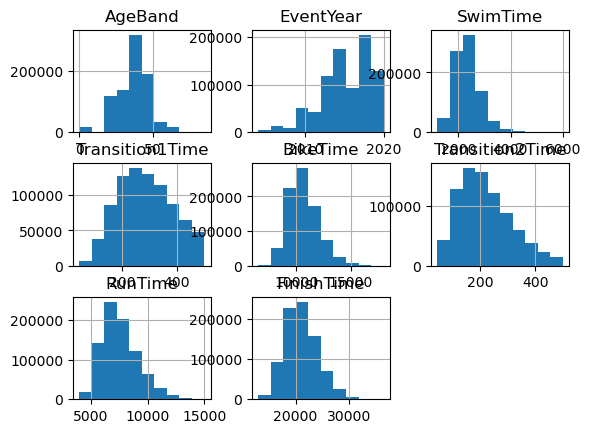

In [7]:
df.hist()

In [11]:
# how many different races?
events = df["EventLocation"].unique()
len(events)

195

In [47]:
df_events = (
    df[["FinishTime", "EventYear", "EventLocation"]]
    .groupby(["EventLocation", "EventYear"])
    .count()
    .rename(columns={"FinishTime": "AthletesCount"})
)
df_events.head()

AthletesCount
EventLocation        EventYear               
IRONMAN 70.3 Aarhus  2014                1115
                     2015                 225
IRONMAN 70.3 Alagoas 2017                 717
                     2019                1004
IRONMAN 70.3 Arizona 2015                1049

In [51]:
# to restore EventLocation and EventYear as columns
# df_events.reset_index()

In [49]:
df_events.head()

AthletesCount
EventLocation        EventYear               
IRONMAN 70.3 Aarhus  2014                1115
                     2015                 225
IRONMAN 70.3 Alagoas 2017                 717
                     2019                1004
IRONMAN 70.3 Arizona 2015                1049

In [34]:
print("Number of events: ", df_events.shape[0])

Number of events:  773


In [30]:
df_events.describe()

,AthletesCount
count,773.000000
mean,1086.772316
std,540.292338
min,1.000000
25%,676.000000
50%,1054.000000
75%,1453.000000
max,4854.000000


In [43]:
print("Event with most athletes: ", df_events.idxmax().values[0],  " with ", df_events.max().values[0], " participants")
print("Event with least athletes: ", df_events.idxmin().values[0],  " with ", df_events.min().values[0], " participants")

Event with most athletes:  ('IRONMAN 70.3 World Championship', 2019)  with  4854  participants
Event with least athletes:  ('IRONMAN 70.3 Pula', 2017)  with  1  participants


In [69]:
# nationalities
athletes_by_country = (
    df["Country"]
    .value_counts()  # count the number of athletes per country
    .to_frame()      # convert Series into DataFrame
    .reset_index()   # "Countries" was an index; move it back
    .rename(columns={"index": "Country", "Country": "AthletesCount"})
)
print("10 countries with most participants")
athletes_by_country.head(10)

10 countries with most participants


,Country,AthletesCount
0,United States,332037
1,Australia,59617
2,Canada,48233
3,Germany,37159
4,United Kingdom,36523
5,Mexico,25535
6,France,24026
7,Brazil,21851
8,South Africa,18376
9,Italy,13963


array([[<Axes: title={'center': 'AgeBand'}>]], dtype=object)

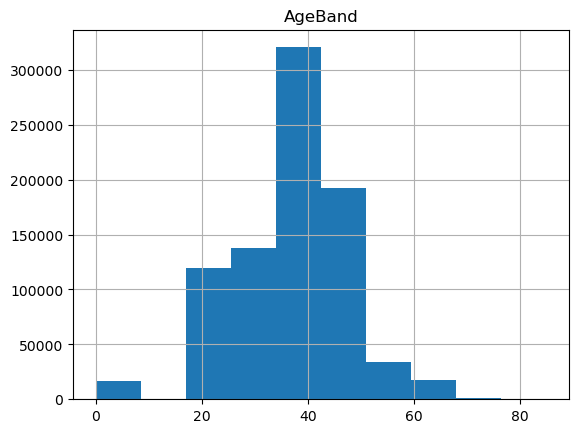

In [75]:
# age groups
df.hist(column="AgeBand")

In [76]:
df.columns

Index(['Gender', 'AgeGroup', 'AgeBand', 'Country', 'CountryISO2', 'EventYear',
       'EventLocation', 'SwimTime', 'Transition1Time', 'BikeTime',
       'Transition2Time', 'RunTime', 'FinishTime'],
      dtype='object')

In [94]:
avg_times_per_age_male = (
    df[["AgeGroup", "SwimTime", 'Transition1Time', 'BikeTime', 'Transition2Time', 'RunTime', 'FinishTime']]
    .loc[df["Gender"] == "M"]  # male athletes
    .groupby(["AgeGroup"]).mean()
) 

<Axes: xlabel='AgeGroup'>

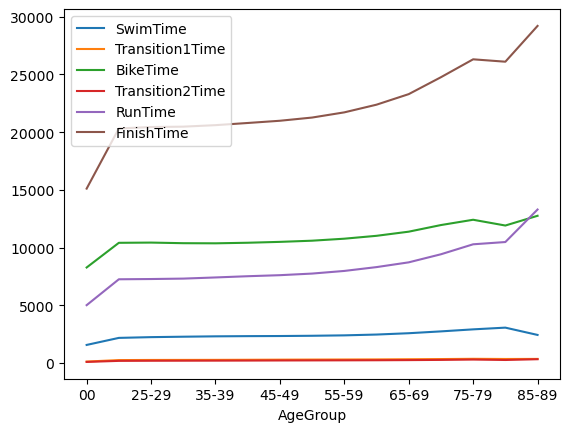

In [97]:
avg_times_per_age_male.plot()

<Axes: xlabel='AgeGroup'>

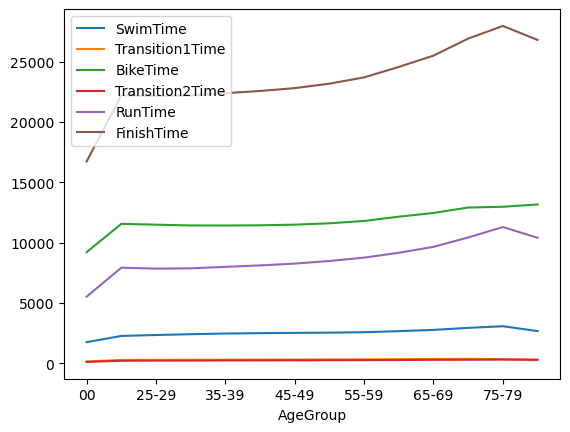

In [98]:
avg_times_per_age_female = (
    df[["AgeGroup", "SwimTime", 'Transition1Time', 'BikeTime', 'Transition2Time', 'RunTime', 'FinishTime']]
    .loc[df["Gender"] == "F"]  # female athletes
    .groupby(["AgeGroup"]).mean()
) 
avg_times_per_age_female.plot()

In [99]:
# how to add the country of the race
events

array(['IRONMAN 70.3 South American Championship Buenos Aires',
       'IRONMAN 70.3 Bariloche', 'IRONMAN 70.3 World Championship',
       'IRONMAN 70.3 Victoria', 'IRONMAN 70.3 Marrakech',
       'IRONMAN 70.3 Santa Cruz', 'IRONMAN 70.3 Dublin',
       'IRONMAN 70.3 Taiwan', 'IRONMAN 70.3 Texas',
       'IRONMAN 70.3 Mallorca', 'IRONMAN 70.3 Barcelona',
       'IRONMAN 70.3 Vichy', 'IRONMAN 70.3 Budapest',
       'IRONMAN 70.3 Punta del Este', 'IRONMAN 70.3 Puerto Rico',
       'IRONMAN 70.3 Liuzhou', 'IRONMAN 70.3 UK',
       "IRONMAN 70.3 Coeur d'Alene", 'IRONMAN 70.3 Wisconsin',
       'IRONMAN 70.3 Cartagena', 'IRONMAN 70.3 Marbella',
       'IRONMAN 70.3 European Championship Elsinore',
       'IRONMAN 70.3 Hawaii', 'IRONMAN 70.3 Boulder',
       'IRONMAN 70.3 Cascais Portugal', 'IRONMAN 70.3 Dubai',
       'IRONMAN 70.3 Nice', 'IRONMAN 70.3 Lanzarote',
       "IRONMAN 70.3 Pays D'Aix", 'IRONMAN 70.3 San Juan',
       'IRONMAN 70.3 Switzerland', 'IRONMAN 70.3 European Championshi

It is not trivial to determine the country where the event took place because
- some events change location (like the European Champeonship)
- some events take place in more than one country (Brazil/Paraguay)
- 